In [2]:
!pip install dtaidistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.0 MB/s eta 0:00:00


In [3]:
import dtaidistance
import numpy as np
import librosa
from matplotlib import pyplot as plt

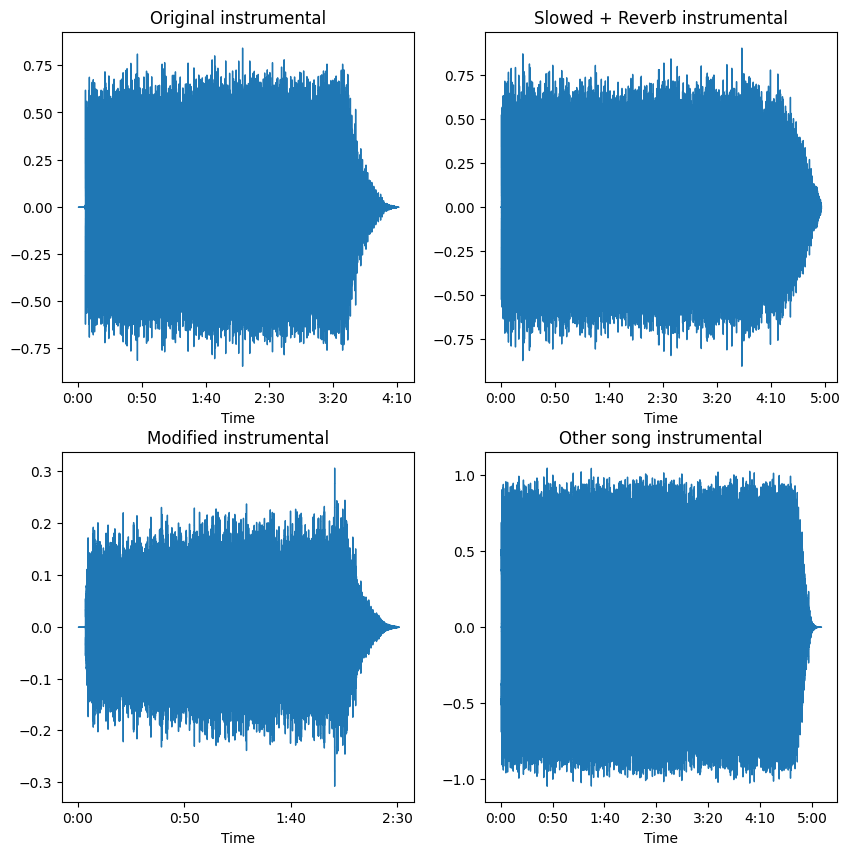

In [6]:
# original, samplerate_original = librosa.load('./audio samples/ebyt original.mp3')
# reverb, samplerate_rev = librosa.load('./audio samples/ebyt rev.mp3')
# mod, samplerate_mod = librosa.load('./audio samples/ebyt mod.mp3')
# other, samplerate_other = librosa.load('./audio samples/ilmy original.mp3')

original, samplerate_original = librosa.load('/content/ebyt original.mp3')
reverb, samplerate_rev = librosa.load('/content/ebyt rev.mp3')
mod, samplerate_mod = librosa.load('/content/ebyt mod.mp3')
other, samplerate_other = librosa.load('/content/ilmy original.mp3')

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(10)
img1 = librosa.display.waveshow(original, sr=samplerate_original, ax=axs[0, 0])
axs[0, 0].set_title('Original instrumental')
img2 = librosa.display.waveshow(reverb, sr=samplerate_rev, ax=axs[0, 1])
axs[0, 1].set_title('Slowed + Reverb instrumental')
img3 = librosa.display.waveshow(mod, sr=samplerate_mod, ax=axs[1, 0])
axs[1, 0].set_title('Modified instrumental')
img4 = librosa.display.waveshow(other, sr=samplerate_other, ax=axs[1, 1])
axs[1, 1].set_title('Other song instrumental')
plt.show()

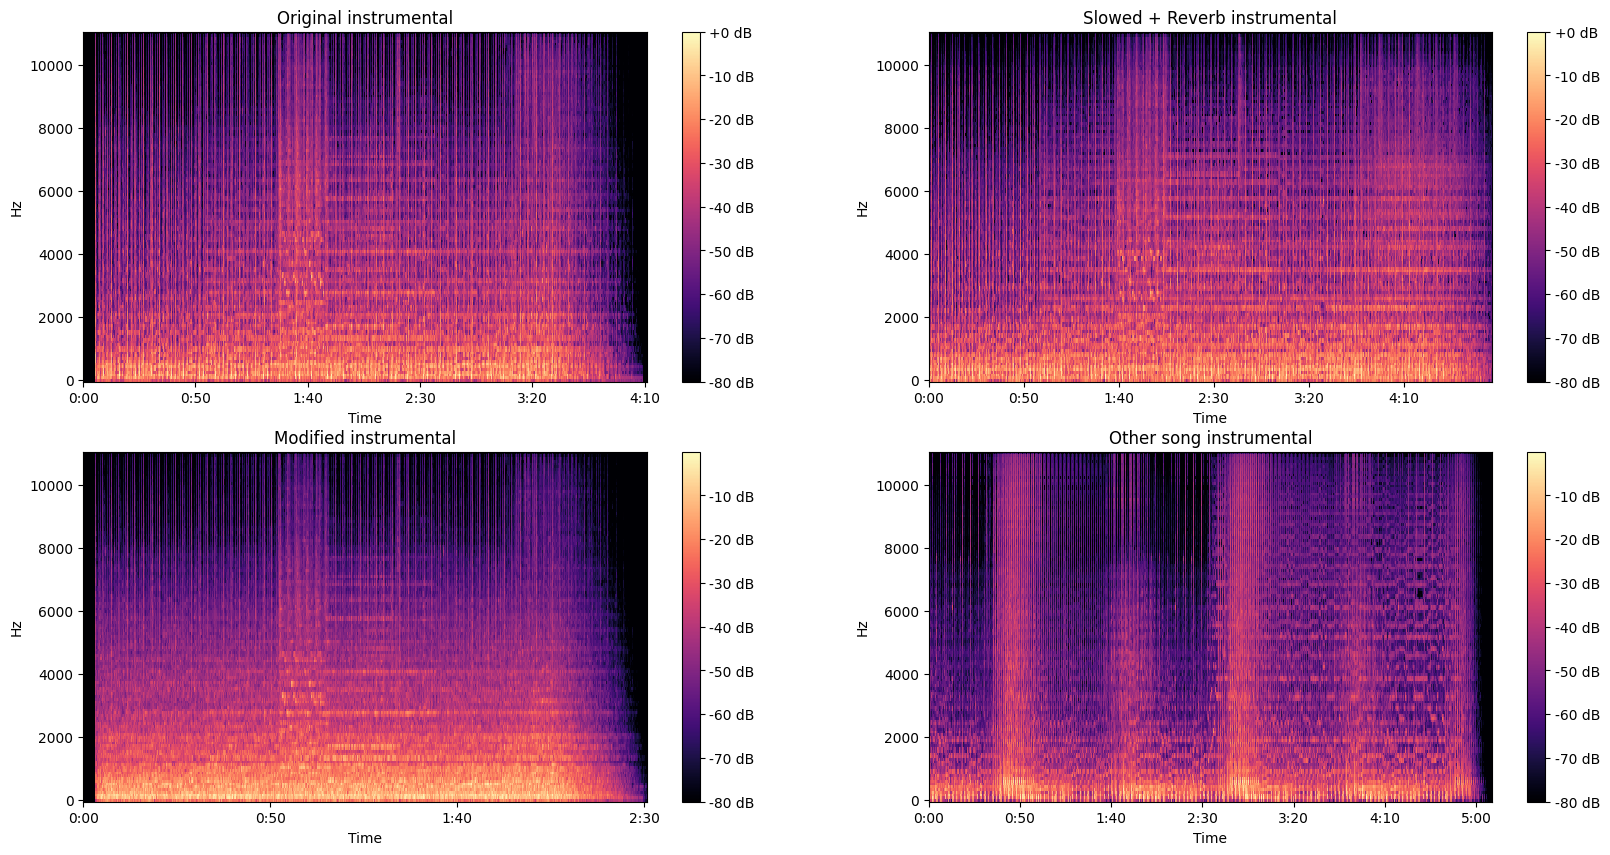

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

In [7]:
log_mel_spectograms = []
def plot_spectrogram(y, sr, hop_length, i, j, y_axis = "linear"):
    plt.figure(figsize = (25,10))
    D = np.abs(librosa.stft(y))**2       # stft = short time fourier transform
    S = librosa.feature.melspectrogram(S=D, sr=sr)
    log_S = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis=y_axis, hop_length=hop_length, ax=axs[i, j])
    fig.colorbar(img, ax=axs[i, j], format='%+2.0f dB')
    log_mel_spectograms.append(log_S.T)

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
plot_spectrogram(original, samplerate_original, 512, 0, 0)
axs[0, 0].set_title('Original instrumental')
plot_spectrogram(reverb, samplerate_rev, 512, 0, 1)
axs[0, 1].set_title('Slowed + Reverb instrumental')
plot_spectrogram(mod, samplerate_mod, 512, 1, 0)
axs[1, 0].set_title('Modified instrumental')
plot_spectrogram(other, samplerate_other, 512, 1, 1)
axs[1, 1].set_title('Other song instrumental')
plt.tight_layout()


In [8]:
#alignment = dtw(log_mel_spectograms[0], log_mel_spectograms[1])
# print(alignment.normalized_distance)
# alignment.plot(type="threeway")
# plt.show()
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(log_mel_spectograms[0], log_mel_spectograms[1])
# dtwvis.plot_warping(log_mel_spectograms[0], log_mel_spectograms[1], path)
# ds = dtw.distance_matrix_fast(log_mel_spectograms, parallel=True)
# print(ds)
# print(log_mel_spectograms[0].shape)
# print(log_mel_spectograms[1].shape)
# print(log_mel_spectograms[2].shape)
# print(log_mel_spectograms[3].shape)

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

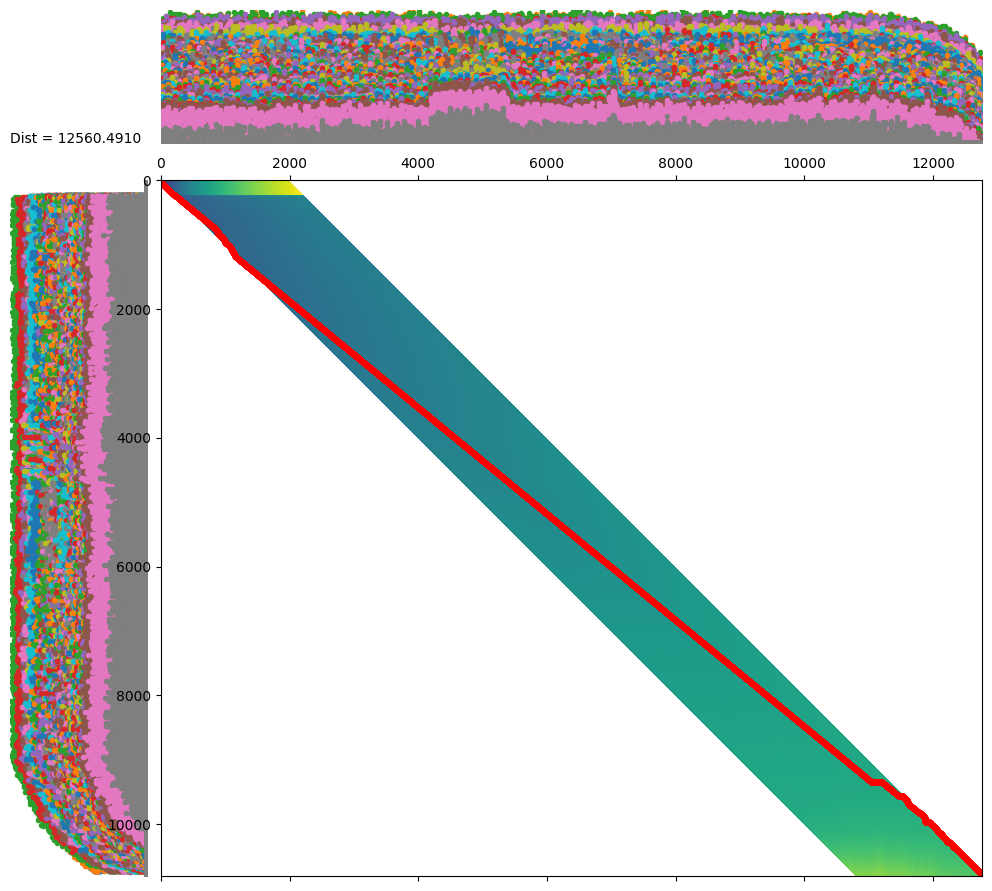

In [9]:
d, paths = dtw.warping_paths(log_mel_spectograms[0], log_mel_spectograms[1], window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(log_mel_spectograms[0], log_mel_spectograms[1], paths, best_path)

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

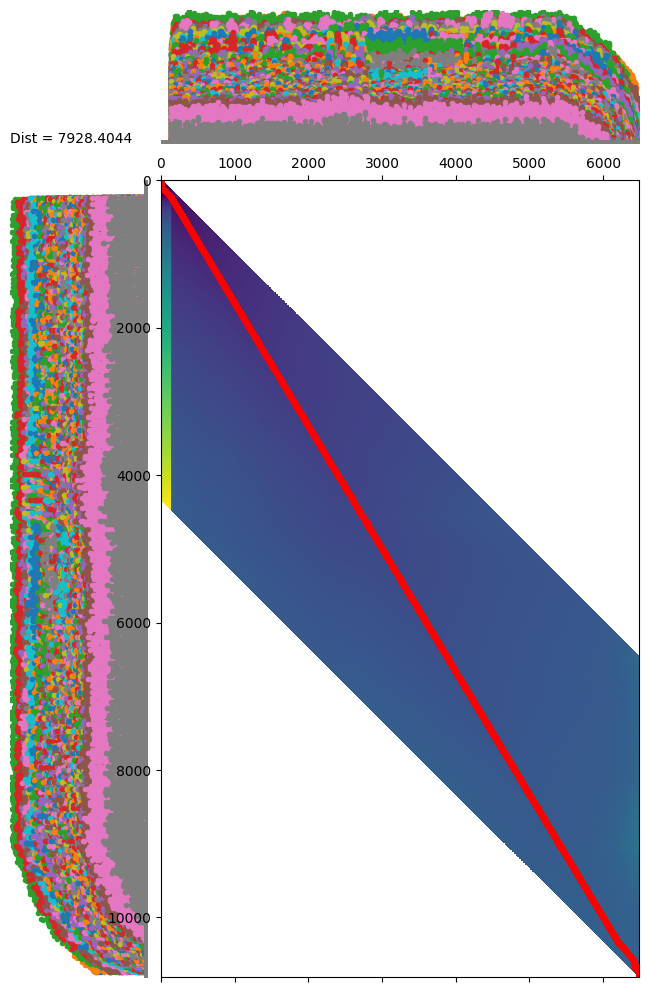

In [10]:
d, paths = dtw.warping_paths(log_mel_spectograms[0], log_mel_spectograms[2], window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(log_mel_spectograms[0], log_mel_spectograms[2], paths, best_path)

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

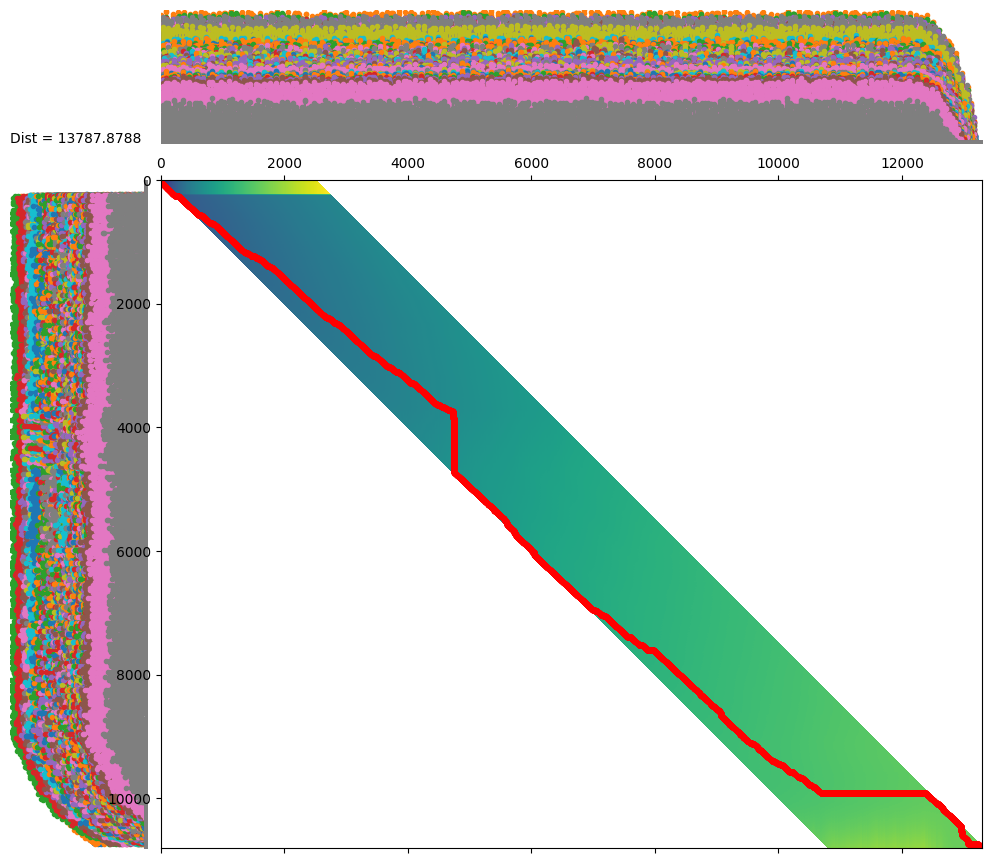

In [11]:
d, paths = dtw.warping_paths(log_mel_spectograms[0], log_mel_spectograms[3], window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(log_mel_spectograms[0], log_mel_spectograms[3], paths, best_path)